# TASK : 4 GRIP FOUNDATION

# Exploratory Data Analysis - TERRORISM


In [1]:
#import libraries
import numpy as np
import pandas as pd
import matplotlib as mp
import seaborn as sn
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS

In [2]:
#Read data
df = pd.read_csv('C:/Users/User/Desktop/Momita/global.csv', encoding='ISO-8859-1')


C:\Users\User\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (4,6,31,33,61,62,63,76,79,90,92,94,96,114,115,121) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [3]:
#enlist columns
df.columns

Index(['eventid', 'iyear', 'imonth', 'iday', 'approxdate', 'extended',
       'resolution', 'country', 'country_txt', 'region',
       ...
       'addnotes', 'scite1', 'scite2', 'scite3', 'dbsource', 'INT_LOG',
       'INT_IDEO', 'INT_MISC', 'INT_ANY', 'related'],
      dtype='object', length=135)

In [4]:
#drop duplicate
dup = df[df.duplicated()]
print(dup)

Empty DataFrame
Columns: [eventid, iyear, imonth, iday, approxdate, extended, resolution, country, country_txt, region, region_txt, provstate, city, latitude, longitude, specificity, vicinity, location, summary, crit1, crit2, crit3, doubtterr, alternative, alternative_txt, multiple, success, suicide, attacktype1, attacktype1_txt, attacktype2, attacktype2_txt, attacktype3, attacktype3_txt, targtype1, targtype1_txt, targsubtype1, targsubtype1_txt, corp1, target1, natlty1, natlty1_txt, targtype2, targtype2_txt, targsubtype2, targsubtype2_txt, corp2, target2, natlty2, natlty2_txt, targtype3, targtype3_txt, targsubtype3, targsubtype3_txt, corp3, target3, natlty3, natlty3_txt, gname, gsubname, gname2, gsubname2, gname3, gsubname3, motive, guncertain1, guncertain2, guncertain3, individual, nperps, nperpcap, claimed, claimmode, claimmode_txt, claim2, claimmode2, claimmode2_txt, claim3, claimmode3, claimmode3_txt, compclaim, weaptype1, weaptype1_txt, weapsubtype1, weapsubtype1_txt, weaptype2, w

In [5]:
#Rename columns
df.rename(columns={'eventid':'Event ID','iyear':'Year','imonth':'Month','iday':'Day','country_txt':'Country','provstate':'State',
                       'region_txt':'Region','attacktype1_txt':'AttackType','target1':'Target','nkill':'Killed',
                       'nwound':'Wounded','summary':'Summary','gname':'Group','targtype1_txt':'Target_type',
                       'weaptype1_txt':'Weapon_type','motive':'Motive'},inplace=True)

In [8]:
#Read first five data
df.head()

,Year,Month,Day,Country,Region,city,latitude,longitude,AttackType,Killed,Wounded,Target,Summary,Group,Target_type,Weapon_type,Motive
0,1970,7,2,Dominican Republic,Central America & Caribbean,Santo Domingo,18.456792,-69.951164,Assassination,1.0,0.0,Julio Guzman,NaN,MANO-D,Private Citizens & Property,Unknown,NaN
1,1970,0,0,Mexico,North America,Mexico city,19.371887,-99.086624,Hostage Taking (Kidnapping),0.0,0.0,"Nadine Chaval, daughter",NaN,23rd of September Communist League,Government (Diplomatic),Unknown,NaN
2,1970,1,0,Philippines,Southeast Asia,Unknown,15.478598,120.599741,Assassination,1.0,0.0,Employee,NaN,Unknown,Journalists & Media,Unknown,NaN
3,1970,1,0,Greece,Western Europe,Athens,37.997490,23.762728,Bombing/Explosion,NaN,NaN,U.S. Embassy,NaN,Unknown,Government (Diplomatic),Explosives,NaN
4,1970,1,0,Japan,East Asia,Fukouka,33.580412,130.396361,Facility/Infrastructure Attack,NaN,NaN,U.S. Consulate,NaN,Unknown,Government (Diplomatic),Incendiary,NaN


In [7]:
df=df[['Year','Month','Day','Country','Region','city','latitude','longitude','AttackType','Killed',
               'Wounded','Target','Summary','Group','Target_type','Weapon_type','Motive']]
df.head()

,Year,Month,Day,Country,Region,city,latitude,longitude,AttackType,Killed,Wounded,Target,Summary,Group,Target_type,Weapon_type,Motive
0,1970,7,2,Dominican Republic,Central America & Caribbean,Santo Domingo,18.456792,-69.951164,Assassination,1.0,0.0,Julio Guzman,NaN,MANO-D,Private Citizens & Property,Unknown,NaN
1,1970,0,0,Mexico,North America,Mexico city,19.371887,-99.086624,Hostage Taking (Kidnapping),0.0,0.0,"Nadine Chaval, daughter",NaN,23rd of September Communist League,Government (Diplomatic),Unknown,NaN
2,1970,1,0,Philippines,Southeast Asia,Unknown,15.478598,120.599741,Assassination,1.0,0.0,Employee,NaN,Unknown,Journalists & Media,Unknown,NaN
3,1970,1,0,Greece,Western Europe,Athens,37.997490,23.762728,Bombing/Explosion,NaN,NaN,U.S. Embassy,NaN,Unknown,Government (Diplomatic),Explosives,NaN
4,1970,1,0,Japan,East Asia,Fukouka,33.580412,130.396361,Facility/Infrastructure Attack,NaN,NaN,U.S. Consulate,NaN,Unknown,Government (Diplomatic),Incendiary,NaN


In [9]:
#Read last five data
df.tail()

,Year,Month,Day,Country,Region,city,latitude,longitude,AttackType,Killed,Wounded,Target,Summary,Group,Target_type,Weapon_type,Motive
181686,2017,12,31,Somalia,Sub-Saharan Africa,Ceelka Geelow,2.359673,45.385034,Armed Assault,1.0,2.0,Checkpoint,12/31/2017: Assailants opened fire on a Somali...,Al-Shabaab,Military,Firearms,NaN
181687,2017,12,31,Syria,Middle East & North Africa,Jableh,35.407278,35.942679,Bombing/Explosion,2.0,7.0,Hmeymim Air Base,12/31/2017: Assailants launched mortars at the...,Muslim extremists,Military,Explosives,NaN
181688,2017,12,31,Philippines,Southeast Asia,Kubentog,6.900742,124.437908,Facility/Infrastructure Attack,0.0,0.0,Houses,12/31/2017: Assailants set fire to houses in K...,Bangsamoro Islamic Freedom Movement (BIFM),Private Citizens & Property,Incendiary,NaN
181689,2017,12,31,India,South Asia,Imphal,24.798346,93.940430,Bombing/Explosion,0.0,0.0,Office,12/31/2017: Assailants threw a grenade at a Fo...,Unknown,Government (General),Explosives,NaN
181690,2017,12,31,Philippines,Southeast Asia,Cotabato City,7.209594,124.241966,Bombing/Explosion,0.0,0.0,Unknown,12/31/2017: An explosive device was discovered...,Unknown,Unknown,Explosives,NaN


In [10]:
df.shape

(181691, 17)

In [11]:
df.describe()

,Year,Month,Day,latitude,longitude,Killed,Wounded
count,181691.000000,181691.000000,181691.000000,177135.000000,1.771340e+05,171378.000000,165380.000000
mean,2002.638997,6.467277,15.505644,23.498343,-4.586957e+02,2.403272,3.167668
std,13.259430,3.388303,8.814045,18.569242,2.047790e+05,11.545741,35.949392
min,1970.000000,0.000000,0.000000,-53.154613,-8.618590e+07,0.000000,0.000000
25%,1991.000000,4.000000,8.000000,11.510046,4.545640e+00,0.000000,0.000000
50%,2009.000000,6.000000,15.000000,31.467463,4.324651e+01,0.000000,0.000000
75%,2014.000000,9.000000,23.000000,34.685087,6.871033e+01,2.000000,2.000000
max,2017.000000,12.000000,31.000000,74.633553,1.793667e+02,1570.000000,8191.000000


In [12]:
# Checking the null velues in data
df.isnull().sum()

Year                0
Month               0
Day                 0
Country             0
Region              0
city              434
latitude         4556
longitude        4557
AttackType          0
Killed          10313
Wounded         16311
Target            636
Summary         66129
Group               0
Target_type         0
Weapon_type         0
Motive         131130
dtype: int64

In [13]:
#Filling all missing values with 0
df = df.fillna(0)
#Filling missing values with medians of the columns
df = df.fillna(df.median())
df.head()

,Year,Month,Day,Country,Region,city,latitude,longitude,AttackType,Killed,Wounded,Target,Summary,Group,Target_type,Weapon_type,Motive
0,1970,7,2,Dominican Republic,Central America & Caribbean,Santo Domingo,18.456792,-69.951164,Assassination,1.0,0.0,Julio Guzman,0,MANO-D,Private Citizens & Property,Unknown,0
1,1970,0,0,Mexico,North America,Mexico city,19.371887,-99.086624,Hostage Taking (Kidnapping),0.0,0.0,"Nadine Chaval, daughter",0,23rd of September Communist League,Government (Diplomatic),Unknown,0
2,1970,1,0,Philippines,Southeast Asia,Unknown,15.478598,120.599741,Assassination,1.0,0.0,Employee,0,Unknown,Journalists & Media,Unknown,0
3,1970,1,0,Greece,Western Europe,Athens,37.997490,23.762728,Bombing/Explosion,0.0,0.0,U.S. Embassy,0,Unknown,Government (Diplomatic),Explosives,0
4,1970,1,0,Japan,East Asia,Fukouka,33.580412,130.396361,Facility/Infrastructure Attack,0.0,0.0,U.S. Consulate,0,Unknown,Government (Diplomatic),Incendiary,0


In [14]:
#Add column Damage (Number of Dead/Injured people) by adding Nkill and Nwound
df['Damage']=df['Killed']+df['Wounded']

In [15]:
#Change some long words inside the dataset
df['Country'] = df['Country'].replace('South Vietnam','Vietnam', regex=True)
df['Weapon_type'] = df['Weapon_type'].replace('Vehicle .*','Vehicle', regex=True)
df['AttackType'] = df['AttackType'].replace('Hostage Taking .*','Hostage Taking', regex=True)

In [16]:
df.info() #() function returns the count, mean, standard deviation, minimum and maximum values and the quantiles of the data.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Data columns (total 18 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Year         181691 non-null  int64  
 1   Month        181691 non-null  int64  
 2   Day          181691 non-null  int64  
 3   Country      181691 non-null  object 
 4   Region       181691 non-null  object 
 5   city         181691 non-null  object 
 6   latitude     181691 non-null  float64
 7   longitude    181691 non-null  float64
 8   AttackType   181691 non-null  object 
 9   Killed       181691 non-null  float64
 10  Wounded      181691 non-null  float64
 11  Target       181691 non-null  object 
 12  Summary      181691 non-null  object 
 13  Group        181691 non-null  object 
 14  Target_type  181691 non-null  object 
 15  Weapon_type  181691 non-null  object 
 16  Motive       181691 non-null  object 
 17  Damage       181691 non-null  float64
dtypes: float64(5), int64(3),

In [17]:
print("Country with the most attacks:",df['Country'].value_counts().idxmax())
print("City with the most attacks:",df['city'].value_counts().index[1]) #as first entry is 'unknown'
print("Region with the most attacks:",df['Region'].value_counts().idxmax())
print("Year with the most attacks:",df['Year'].value_counts().idxmax())
print("Month with the most attacks:",df['Month'].value_counts().idxmax())
print("Group with the most attacks:",df['Group'].value_counts().index[1])
print("Most Attack Types:",df['AttackType'].value_counts().idxmax())

Country with the most attacks: Iraq
City with the most attacks: Baghdad
Region with the most attacks: Middle East & North Africa
Year with the most attacks: 2014
Month with the most attacks: 5
Group with the most attacks: Taliban
Most Attack Types: Bombing/Explosion


In [18]:
comment_words = ''
stopwords = set(STOPWORDS)

# Finding Hot zones of terrorism

# Country wise

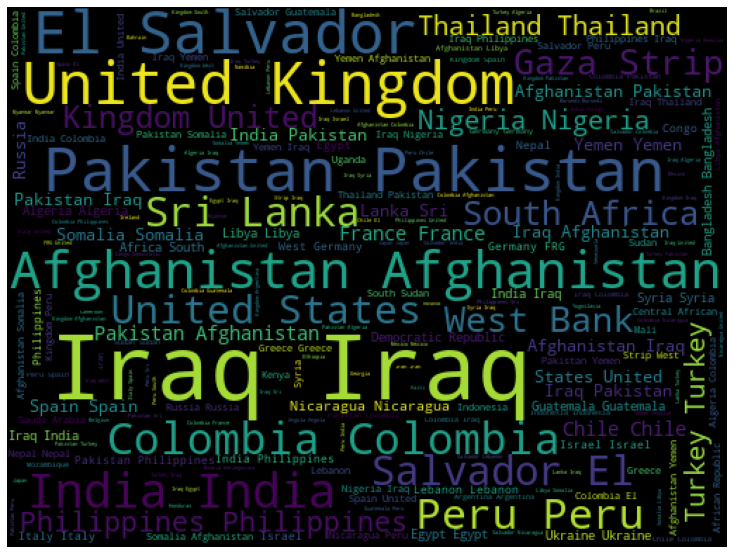

In [19]:
#ploting wordcloud for countries which has maximum terror 
Country = df.Country.dropna(False)
plt.subplots(figsize=(10,10))
wordcloud = WordCloud(background_color = 'black',
                     width = 512,
                     height = 384).generate(','.join(map(str, Country)))
plt.axis('off')
plt.imshow(wordcloud)
plt.tight_layout(pad = 0)
plt.show()

In [20]:
df['Year'].value_counts().sort_index()

1970      651
1971      471
1972      568
1973      473
1974      581
1975      740
1976      923
1977     1319
1978     1526
1979     2662
1980     2662
1981     2586
1982     2544
1983     2870
1984     3495
1985     2915
1986     2860
1987     3183
1988     3721
1989     4324
1990     3887
1991     4683
1992     5071
1994     3456
1995     3081
1996     3058
1997     3197
1998      934
1999     1395
2000     1814
2001     1906
2002     1333
2003     1278
2004     1166
2005     2017
2006     2758
2007     3242
2008     4805
2009     4721
2010     4826
2011     5076
2012     8522
2013    12036
2014    16903
2015    14965
2016    13587
2017    10900
Name: Year, dtype: int64

# Bar Plot

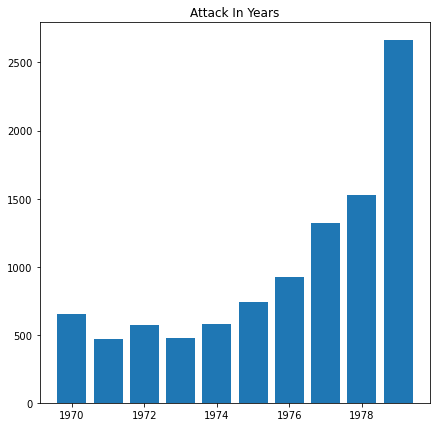

In [21]:
df = pd.DataFrame(df)
Year = df['Year'].unique()
Attack = df['Year'].value_counts(dropna = False).sort_index()
# Figure Size
fig = plt.figure(figsize =(7,7))
 
plt.bar(Year[0:10],Attack[0:10])
plt.title('Attack In Years')
# Show Plot
plt.show()

# Terrorist Activities by Region in each Year

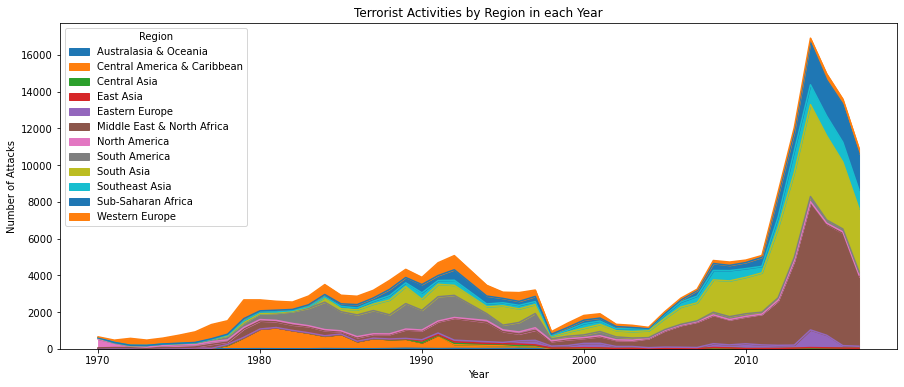

In [22]:
pd.crosstab(df.Year, df.Region).plot(kind='area',figsize=(15,6))
plt.title('Terrorist Activities by Region in each Year')
plt.ylabel('Number of Attacks')
plt.show()

In [23]:
df.corr() #correlation heatmap

,Year,Month,Day,latitude,longitude,Killed,Wounded,Damage
Year,1.000000,0.000139,0.018254,0.186348,0.003807,0.021252,0.017484,0.020675
Month,0.000139,1.000000,0.005497,-0.014956,-0.003832,0.004031,0.003178,0.003805
Day,0.018254,0.005497,1.000000,0.005018,-0.002257,-0.003225,-0.001082,-0.001808
latitude,0.186348,-0.014956,0.005018,1.000000,0.001365,-0.016579,0.016645,0.009492
longitude,0.003807,-0.003832,-0.002257,0.001365,1.000000,-0.000570,0.000203,0.000014
Killed,0.021252,0.004031,-0.003225,-0.016579,-0.000570,1.000000,0.443326,0.651885
Wounded,0.017484,0.003178,-0.001082,0.016645,0.000203,0.443326,1.000000,0.968724
Damage,0.020675,0.003805,-0.001808,0.009492,0.000014,0.651885,0.968724,1.000000


# Generate a correlation heatmap

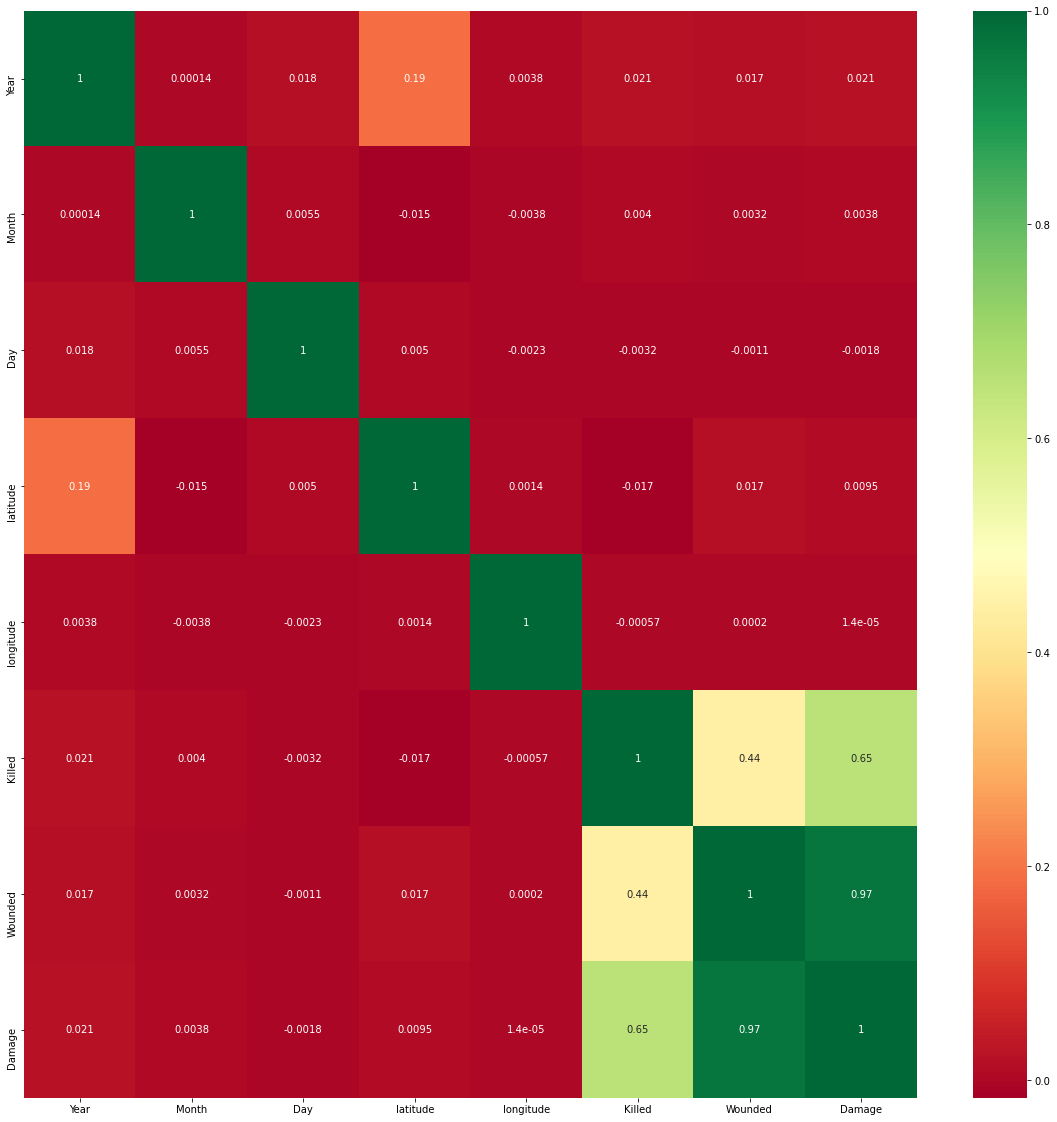

In [24]:
X = df.iloc[:,0:20]  #independent columns
y = df.iloc[:,-1]    #target column i.e price range
#get correlations of each features in dataset
corrmat = df.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sn.heatmap(df[top_corr_features].corr(),annot=True,cmap="RdYlGn")

# Displaying the cell values

               Year     Month       Day  latitude  longitude    Killed  \
Year       1.000000  0.000139  0.018254  0.186348   0.003807  0.021252   
Month      0.000139  1.000000  0.005497 -0.014956  -0.003832  0.004031   
Day        0.018254  0.005497  1.000000  0.005018  -0.002257 -0.003225   
latitude   0.186348 -0.014956  0.005018  1.000000   0.001365 -0.016579   
longitude  0.003807 -0.003832 -0.002257  0.001365   1.000000 -0.000570   
Killed     0.021252  0.004031 -0.003225 -0.016579  -0.000570  1.000000   
Wounded    0.017484  0.003178 -0.001082  0.016645   0.000203  0.443326   
Damage     0.020675  0.003805 -0.001808  0.009492   0.000014  0.651885   

            Wounded    Damage  
Year       0.017484  0.020675  
Month      0.003178  0.003805  
Day       -0.001082 -0.001808  
latitude   0.016645  0.009492  
longitude  0.000203  0.000014  
Killed     0.443326  0.651885  
Wounded    1.000000  0.968724  
Damage     0.968724  1.000000  


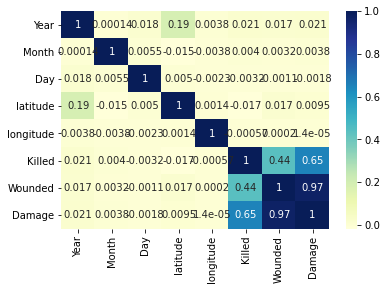

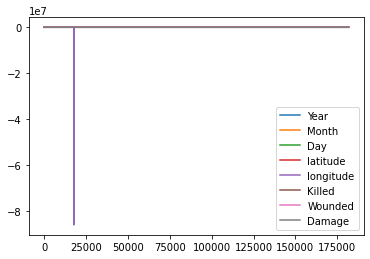

In [25]:
# prints data that will be plotted
# columns shown here are selected by corr() since
# they are ideal for the plot
print(df.corr())
  
# plotting correlation heatmap
dataplot = sn.heatmap(df.corr(), cmap="YlGnBu", annot=True)
  
# displaying heatmap
df.plot()
plt.show()

The data to be plotted:

[[94 57  8 52 65 30 30 53 21  3]
 [69 81 43  1 24 53 13 34 94 75]
 [14 43 10 93 15 49 60 58 72 60]
 [48 87 42 58 40 21 78 67 20 78]
 [34 19 10  8 65 53 88 13 75 54]
 [53 54  1 67 20 96 76 18 49 97]
 [81 73 49 71 65 74 10 49 19 70]
 [ 2 26 94 23 41 40 26 20 71 53]
 [ 1  8 36 70 54 65 97 85 85 82]
 [48 41 14  9 89 98 66 56 70 16]]


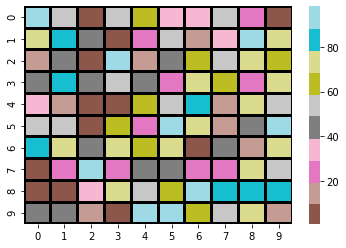

In [26]:
data = np.random.randint(low = 1,high = 100,size = (10, 10))
                       
print("The data to be plotted:\n")
print(data)
  
cmap = "tab20"
center=0
linewidths = 2
linecolor = "black"
# plotting the heatmap
h = sn.heatmap(data = data, cmap=cmap, center=center, linewidths=linewidths, linecolor=linecolor)
  
# displaying the plotted heatmap
plt.show()

The data to be plotted:

[[32 27 26 83 42 31 54 74 48  2]
 [59 87 84 98 62 21 11 16 61 51]
 [56 14  5 87 64 58 82  3 63 54]
 [17 44 23 65 16 71 57 55 40 63]
 [98  4 95 53 50 58 69 98 71 34]
 [ 1 78 91  6 66 85 10 12 71  9]
 [ 8 58 77 10 56 22 21 19 80 94]
 [ 8 84 45 71 70 45 34 65 42 20]
 [54 85 39 62 87 96 29 75 85 47]
 [22 83 27 76 33 23 13 70 48 86]]


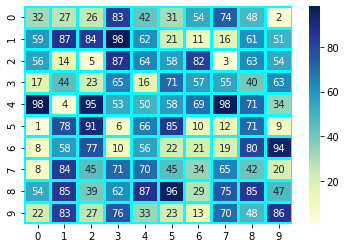

In [27]:
data = np.random.randint(low = 1,high = 100,size = (10, 10))
                       
print("The data to be plotted:\n")
print(data)

annot = True
# setting the parameter values
linewidths = 2
linecolor = "cyan"
cmap="YlGnBu"
# plotting the heatmap
h = sn.heatmap(data = data, annot=annot, linewidths=linewidths, linecolor=linecolor, cmap=cmap)
  
# displaying the plotted heatmap
plt.show()

# Analyse the Terrorist attack types and Damage

<ipython-input-28-ca8cae5a8eb1>:26: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


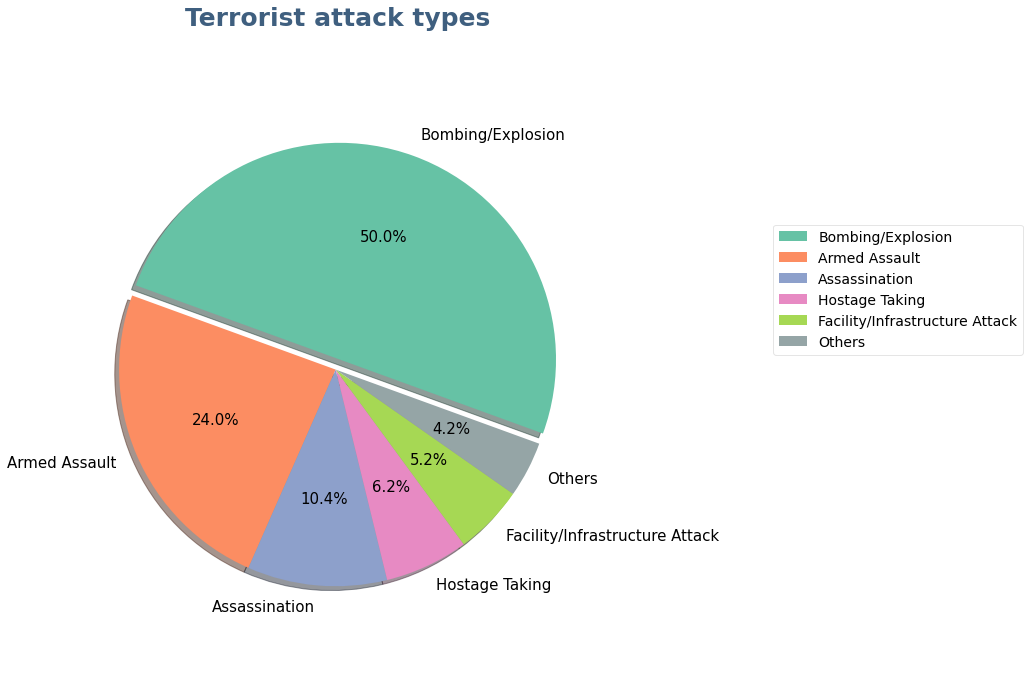

In [28]:
atk_filtered =df['AttackType'].apply(lambda x: x if x in ['Bombing/Explosion','Armed Assault','Assassination','Hostage Taking','Facility/Infrastructure Attack'] else 'Others')
attack_type = atk_filtered.value_counts().tolist()

# Pie chart of Terrorist attack types
labels = ['Bombing/Explosion','Armed Assault','Assassination',
          'Hostage Taking','Facility/Infrastructure Attack','Others']

sizes = []

for i in attack_type:
    percent = i*100//len(df['AttackType'])
    sizes.append(percent)

fig, ax = plt.subplots(figsize=(10,10))
patches, texts, autotexts = ax.pie(sizes, labels=labels, autopct='%1.1f%%',
        startangle = -20, shadow = True,
        explode = (0.05, 0, 0, 0, 0, 0),
        colors = sn.color_palette("Set2", 8)[:5]+[(0.5843137254901961, 0.6470588235294118, 0.6509803921568628)],
        textprops={'fontsize':15,'weight':'light','color':'k'})

ax.axis('equal')
plt.title('Terrorist attack types', fontsize= 25, pad= -70, weight ='bold', 
             color = sn.cubehelix_palette(8, start=.5, rot=-.75)[-3]) #pad change the distance from title to graph
plt.tight_layout()
ax.legend(loc='lower right',framealpha = 0.5,bbox_to_anchor=(1.8,0.5,0.1,1), prop={'size': 14})
fig.show()

In [29]:

# Create table_1 about Attack types and number of Dead/Injured People

cat = ['Bombing/Explosion','Armed Assault','Assassination','Hostage Taking','Facility/Infrastructure Attack']
color_cat = sn.color_palette("Set2", 8)[:5]
color_cat_dict = dict(zip(cat, color_cat))

table_1 = df[['AttackType','Damage']].groupby('AttackType',as_index = False).sum().sort_values(by='Damage', ascending=False)
table_1 = table_1.reset_index()

inci = [88255,42669,7276,19312,12149,659,1015,10356]
table_1["Incidents"] = np.array(inci)

table_1["Damage_rate"] = table_1["Damage"]/table_1["Incidents"]
table_1

,index,AttackType,Damage,Incidents,Damage_rate
0,2,Bombing/Explosion,530007.0,88255,6.005405
1,0,Armed Assault,237663.0,42669,5.569922
2,7,Unknown,47106.0,7276,6.474162
3,5,Hostage Taking,39121.0,19312,2.025735
4,1,Assassination,38807.0,12149,3.194255
5,4,Hijacking,20719.0,659,31.440061
6,6,Unarmed Assault,14907.0,1015,14.686700
7,3,Facility/Infrastructure Attack,7407.0,10356,0.715238


<ipython-input-30-bc7d058c47ac>:35: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(labels, rotation=45)
<ipython-input-30-bc7d058c47ac>:40: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


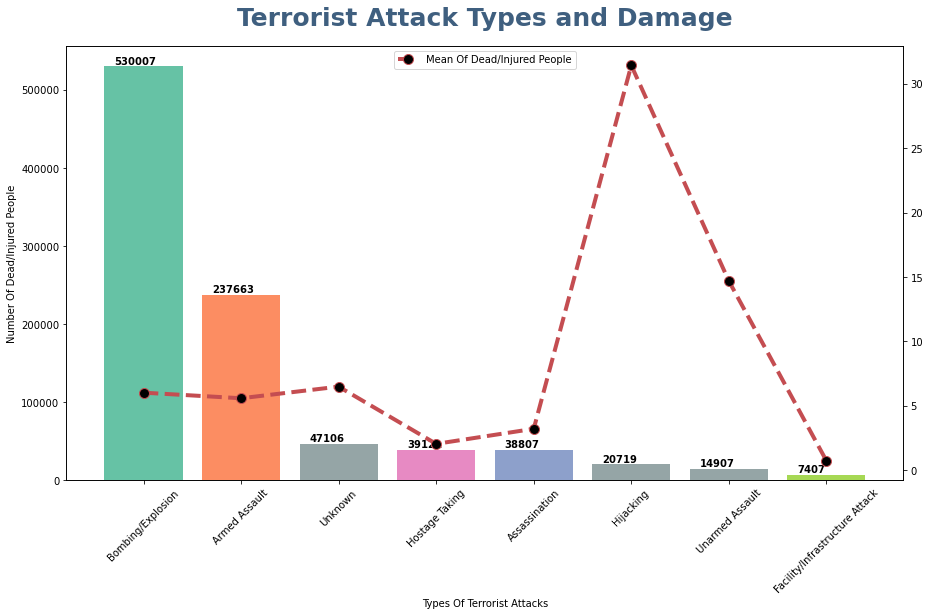

In [30]:
labels = table_1['AttackType'].tolist()
x = np.arange(len(labels)) 
dmg = table_1['Damage'].tolist()

gray = (0.5843137254901961, 0.6470588235294118, 0.6509803921568628)
color_list = [color_cat_dict[ter_type] if ter_type in color_cat_dict.keys() else gray for ter_type in labels]

d_rate = table_1["Damage_rate"].tolist()
fig, ax1 = plt.subplots(figsize=(15,8))

# Bar chart
ax1.bar(labels, dmg,
       color = color_list,
       align='center')

# Number in bar chart
for i,v in enumerate(dmg):
    ax1.text(i-0.3, v-13000 if v==37209 else v+3000, str(round(v)), 
             color='w' if v==37209 else 'k',
             fontweight='bold')


# Insert a second plot -line plot
ax2 = ax1.twinx()
ax2.plot(labels, d_rate, linestyle='--', linewidth =4, marker ='o', 
         markerfacecolor='black', markersize =10,
         label='Mean Of Dead/Injured People',
        color = '#C44D51')

plt.title('Terrorist Attack Types and Damage', fontsize= 25, pad= 20, weight ='bold', 
             color = sn.cubehelix_palette(8, start=.5, rot=-.75)[-3]) 

ax1.set(xlabel='Types Of Terrorist Attacks', ylabel='Number Of Dead/Injured People')

ax1.set_xticklabels(labels, rotation=45)

plt.yticks(fontsize=10)

ax2.legend(loc='upper center') 
fig.show()

The total number of dead/injured people caused by Bombing/Explosion is the highest (514.233 people) since 48.6% of terrorist attacks belong to this type. However, Hijacking is actually the type of attacks which kills and injures the most number of people per attack (>30 people per attack). Facility/Infrastructure Attack type kills the least number of people both in total and per case.

# THANKYOU